<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/ECUACION_DIFERENCIAL_STURM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMENZAMOS RESOLVIENDO EN FORMA DE STURM LIOVILLE
$$
f'' + 2f´ + \lambda f = 0
$$
donde
$$p(x)= e^{2x}$$ $$ q(x)=0  $$ $$\sigma = e^{2x}$$ $$ k1=k3=1$$ $$k2=k4=0$$

# Solucion General de la EDO


In [ ]:
from sympy import symbols, Function, Eq, Derivative, dsolve, exp, sqrt

# Definir variables simbólicas
x, lam = symbols('x lambda')
f = Function('f')(x)

# Definir la EDO
edo = Eq(Derivative(f, x, x) + 2*Derivative(f, x) + lam*f, 0)

# Resolver simbólicamente
sol_general = dsolve(edo, f)

# Mostrar la solución
print(sol_general)

Eq(f(x), C1*exp(x*(sqrt(1 - lambda) - 1)) + C2*exp(-x*(sqrt(1 - lambda) + 1)))


**Definimos nuestros armonicos**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

N = 50
x_grid = np.linspace(0, 1, 500)

# u y sigma
u_exact = np.exp(-x_grid)
peso_sigma = 1

**Resolvemos la EDO rescribiendo com sistema para poder ponerla dentro de nuestro for con la funcion solve-bvp**

In [ ]:
# Sistema equivalente a (e^{2x} f')' + lambda e^{2x} f = 0
def sistema(x, y, lam):
    return np.vstack([y[1], -lam * y[0]])


def bc(ya, yb):
    return np.array([ya[0], yb[0]])

# Valores iniciales para resolver BVP
def valores_iniciales(x):
    return np.vstack([np.sin(np.pi * x), np.pi * np.cos(np.pi * x)])


Usaremos la siguiente formula para una mejor aproximacion de nuestra serie
$$
C_n = \frac{\displaystyle\int_a^b u(x)\, f_n(x)\, \sigma(x)\, dx}{\displaystyle\int_a^b f_n^2(x)\, \sigma(x)\, dx}
$$

In [ ]:
# Aproximación con fórmula  de coeficientes de Fourier
Cn = np.zeros_like(x_grid)
for n in range(1, N + 1):
    lam_guess = (n * np.pi)**2
    sol = solve_bvp(lambda x, y: sistema(x, y, lam_guess), bc, x_grid, valores_iniciales(x_grid))

    if sol.success:
        f_n = sol.sol(x_grid)[0]


        numerador = np.trapz(u_exact * f_n * peso_sigma, x_grid)
        denominador = np.trapz(f_n**2 * peso_sigma, x_grid)

        # Coeficiente Cn
        c_n = numerador / denominador

        # Acumulamos la suma
        Cn += c_n * f_n

<ipython-input-38-693108ae61b2>:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  numerador = np.trapz(u_exact * f_n * peso_sigma, x_grid)
<ipython-input-38-693108ae61b2>:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  denominador = np.trapz(f_n**2 * peso_sigma, x_grid)


**Graficando la aproximacion de coeficientes de fourier**

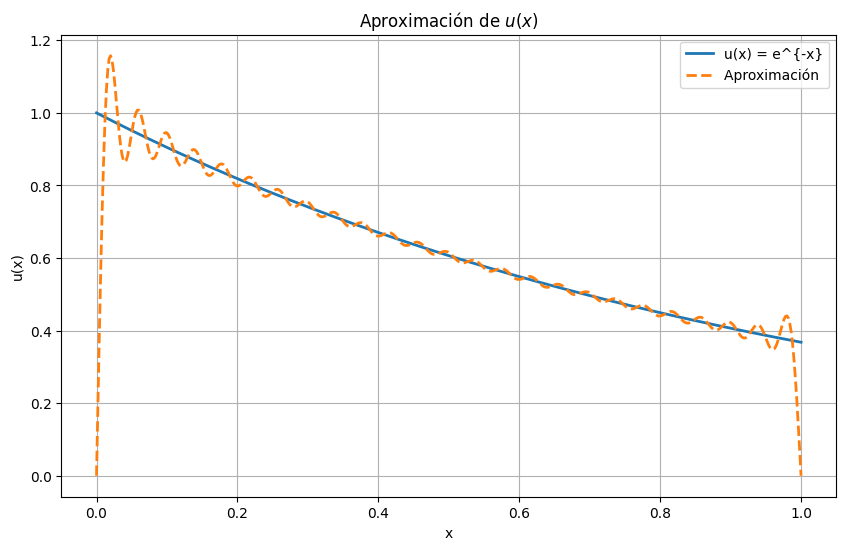

In [ ]:
# Graficando u(x) y la serie de fourier
plt.figure(figsize=(10, 6))
plt.plot(x_grid, u_exact, label='u(x) = e^{-x}', linewidth=2)
plt.plot(x_grid, Cn, '--', label='Aproximación ', linewidth=2)
plt.title('Aproximación de $u(x)$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()